### Tam Sentiment Analysis

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import emoji

In [7]:
!pip install emoji 

In [8]:
fake_train_dataset = pd.read_csv('./data/mal_fake_train.csv')#, encoding='ISO-8859-1')
fake_dev=pd.read_csv('./data/mal_fake_dev.csv')#, encoding='ISO-8859-1')
# Merge the two dataframes
fake_train_dataset = pd.concat([fake_train_dataset, fake_dev])
fake_train_dataset.head(50)

Unnamed: 0                                               text     label
0         4438                             Sajan sir pedichu poyo      Fake
1         1937                                      р┤╕р╡Нр┤кр╡Лр╡║р┤╕р╡╝ р┤пр╡Бр┤Ор┤╕р╡Н      Fake
2         4131  р┤ир┤┐р┤Щр╡Нр┤Щр┤│р╡Кр┤Хр╡Нр┤Хр╡Ж р┤Ор┤ир╡Нр┤др╡Н р┤Ер┤▒р┤┐р┤Юр╡Нр┤Юр┤┐р┤Яр╡Нр┤Яр┤╛р┤гр╡Н ЁЯЩД р┤др┤┐р┤░р╡Бр┤╡р┤╛р┤др┤┐р┤░ р┤Хр┤│...  original
3          456  р┤Зр┤ир╡Нр┤др╡Нр┤пр╡╗ р┤Чр┤╡р┤гр╡Нр┤ор╡Жр┤ир╡Нр┤▒р╡Н р┤кр╡Нр┤░р┤Цр╡Нр┤пр┤╛р┤кр┤┐р┤Ър╡Нр┤Ъ р┤╣р╡Лр┤ор┤┐р┤пр╡Лр┤кр┤др┤┐ р┤ор╡Жр┤бр┤┐...      Fake
4         3943                                    Good chainaЁЯСНЁЯСНЁЯСНЁЯСН      Fake
5         2955  р┤Зр┤др┤╛р┤гр╡Н р┤╡р╡Ар┤Яр╡Н р┤╡р╡Зр┤╡р╡Бр┤ор╡Нр┤кр╡Лр╡╛ р┤╡р┤╛р┤┤р┤╡р╡Жр┤Яр╡Нр┤Яр╡Бр┤ир╡Нр┤ир╡Б<br>р┤Ор┤ир╡Нр┤ир╡Нр┤кр┤▒р┤п...  original
6         3642              Kalikkarikal aarum mask ittittillallo  original
7         3511                 р┤╡р┤Хр╡Нр┤╕р┤┐р╡╗  р┤Ор┤Яр╡Бр┤др╡Нр┤др╡Н  р┤Ор┤др╡Нр┤░  р┤кр╡Зр╡╝ р┤ор┤░р┤┐р┤Ър╡Нр┤Ър╡Б      Fake
8          525    Ee Veena George ne okke pidichu kinattil idanam  original
9         1196  р┤Юр┤╛р╡╗ р┤Тр┤░р╡Б р┤Ор┤╕р╡Н р┤Ор╡╜ р┤Зр┤░р╡Лр┤Чр┤┐р┤пр┤╛р┤гр╡НтАМр┤Тр┤░р╡Бр┤кр┤╛р┤Яр╡НтАМр┤Жр┤пр╡Бр╡╝р┤╡р╡Нр┤╡р╡Зр┤др┤Ър┤┐р┤Хр┤┐...      Fake
10         492  р┤Хр╡Кр┤▒р╡Лр┤г р┤ор┤Яр┤Щр╡Нр┤Щр╡Бр┤В р┤Ор┤ир╡Нр┤ир╡Н р┤кр┤▒р┤Юр╡Нр┤Юр╡Б р┤ир┤┐р┤Щр╡Нр┤Щр╡╛. р┤И р┤╡р┤╛р╡╝р┤др╡Нр┤д р┤Хр╡Б...      Fake
11        4611                                            р┤Хр╡Кр┤│р╡Нр┤│р┤╛р┤В      Fake
12        1356  Ayyo ithipol ano marunadan arinjathu  ithu ann...      Fake
13        3530                                           р┤╣р┤╛р┤пр╡Н р┤╕р╡╝.      Fake
14         130  р┤Зр┤др╡Н р┤кр┤┐р┤ир╡Нр┤ир╡Ар┤Яр╡Н р┤Яр╡Нр┤░р╡Лр╡╛ р┤Жр┤Хр╡Бр┤╡р╡Жр┤ир╡Нр┤ир╡Бр┤│р╡Нр┤│ р┤мр╡Лр┤зр┤В р┤кр╡Лр┤▓р╡Бр┤В р┤кр┤╛р╡╝...  original
15         539    Today&#39;s news is very good. Thanks marunada.      Fake
16        2831        M A Baby very Happy... JACKIE  JACKIE ...ЁЯШВЁЯШВ  original
17        3790  Avar prathirodha marunnu kandu pidicha sesham,...      Fake
18        3729  р┤ор┤ир╡Бр┤╖р╡Нр┤пр╡╗ р┤Йр┤гр╡Нр┤Яр╡Жр┤Щр╡Нр┤Хр┤┐р╡╜ р┤ор┤╛р┤др╡Нр┤░р┤ор╡З р┤Хр╡Кр┤▒р╡Лр┤гр┤пр╡Нр┤Хр╡Н р┤Ьр╡Ар┤╡р┤┐р┤Хр╡Нр┤Хр┤╛р╡╗...      Fake
19        1544  р┤Жр┤гр╡Л ? р┤кр┤▒р┤Ър╡Нр┤Ър┤┐р┤▓р┤┐р╡╜ р┤Ор┤ир╡Нр┤др╡Л р┤Тр┤░р╡Б р┤кр┤┐р┤Яр╡Бр┤др╡Нр┤др┤ор╡Бр┤гр╡Нр┤Яр┤▓р╡Нр┤▓р╡Л р┤╖р┤╛р┤Ь...      Fake
20        1312  <b>р┤Юр┤Щр╡Нр┤Щр┤│р╡Ж р┤╕р┤╣р╡Лр┤жр┤░р┤ир╡Ж р┤Хр╡Кр┤ир╡Нр┤ир┤┐р┤Яр╡Нр┤Яр╡Н р┤Жр┤░р╡Бр┤В р┤Зр┤ир╡Нр┤ир╡Н</b> <b...  original
21        3692           р┤Хр┤╖р╡Нр┤Яр┤В!!!! р┤др┤┐р┤░р╡Бр┤╡р┤╛р┤др┤┐р┤░р┤пр╡Ж р┤ир┤╛р┤гр┤В р┤Хр╡Жр┤Яр╡Бр┤др╡Нр┤др┤┐.....  original
22        1938  Cammi China covid kaaranam Lokam muzhuvan anub...      Fake
23        4653  Covid positive ayi eee... vedio kanunna...le*n...      Fake
24        1163                                   Avatharanam poli  original
25        5081                               р┤З р┤╖р╡╝р┤Яр╡Нр┤Яр╡Н р┤пр╡Вр┤гр┤┐р┤лр╡Лр┤В р┤Жр┤гр╡Л      Fake
26        3632  р┤Зр┤╡р┤┐р┤Яр╡Ж р┤ор╡Жр┤Чр┤╛ р┤др┤┐р┤░р╡Бр┤╡р┤╛р┤др┤┐р┤░ р┤Ер┤╡р┤┐р┤Яр╡Ж р┤╡р┤┐р┤▓р┤╛р┤кр┤пр┤╛р┤др╡Нр┤░..р┤Йр┤│р╡Бр┤кр╡Нр┤кр╡Н...  original
27        1088                   Pinarayi ku romancham varununu..  original
28         392                                   Serikkum andames  original
29         162  р┤Ер┤пр╡Нр┤пр╡Л... р┤Хр╡Кр┤▒р╡Лр┤гр┤пр╡Ж р┤Ор┤▓р╡Нр┤▓р┤╛р┤░р╡Бр┤В р┤Ър╡Зр╡╝р┤ир╡Нр┤ир╡Б р┤Ър┤╡р┤┐р┤Яр╡Нр┤Яр┤┐ р┤Хр╡Кр┤▓р╡Н...  original
30        2752  10 р┤▓р┤Хр╡Нр┤╖р┤В р┤кр╡Зр╡╝ р┤ор┤░р┤┐р┤Хр╡Нр┤Хр╡Бр┤В <br>р┤Ор┤ир╡Нр┤ир╡Н р┤др┤╛р┤Щр╡Нр┤Хр╡╛ р┤кр┤▒р┤Юр╡Нр┤Юр┤┐р┤░...      Fake
31        3684      Onnum parayanilla. CPM ellam mandhbudhikalaan  original
32        2353                                          Very true      Fake
33         819  р┤кр┤ир╡Нр┤ир┤кр┤Яр╡Нр┤Яр┤┐р┤Хр╡╛ р┤Жр┤гр╡Н р┤Ър╡Ир┤ир┤Хр╡Нр┤Хр┤╛р╡╝ р┤╡р╡Жр┤│р┤┐р┤╡р╡Н р┤Зр┤▓р╡Нр┤▓р┤╛р┤др╡Нр┤др┤╡р┤ир╡Нр┤ор┤╛р╡╝...      Fake
34        2607  р┤╡р┤┐р┤Яр┤кр┤▒р┤пр╡Бр┤Хр┤пр┤╛р┤гр╡Л р┤ир╡А р┤Хр╡Кр┤▒р╡Лр┤г р┤Ер┤Хр┤▓р╡Ж р┤Ер┤Хр┤▓р╡Ж р┤ир╡А р┤кр

<Axes: ylabel='text'>

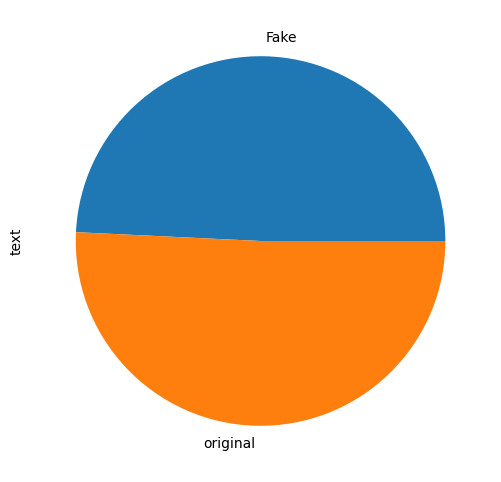

In [9]:
# visualize using PieChart
fig,axis=plt.subplots(figsize=(8,6))
fake_train_dataset.groupby('label')['text'].count().plot.pie(ax=axis)

In [10]:
# Construct a column  ЁЭРмЁЭРЬЁЭРиЁЭРлЁЭРЮЁЭРжЁЭРЪЁЭРй  Use the mapping {'positive':1, 'negative':0} on the  ЁЭРмЁЭРЬЁЭРиЁЭРлЁЭРЮ  column
def get_score(value):
    if(value == 'original'):
        a=1
    elif(value == 'Fake'):
        a=0
        
    return a

In [11]:
def preprocess_text(text):

  if isinstance(text, str):

    print("Original Text:", text)

    # Remove HTML tags
    text = re.sub('<[^>]*>', ' ', text)
    #print("Text after removing HTML tags:", text)
    # Convert to lowercase
    text =  text.lower()
    #print("Converting to lowercase:", text)
    # regular expression to match URLs
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    #print("Text after removing regular expression to match URLs:", text)

    text = re.sub(r'\d+', ' ', text)
    #print("Text after removing digital:", text)

    # Combine words back into a single string
    preprocessed_text = ''.join(text)
    #print("Final pre-processed text:", preprocessed_text)
    return preprocessed_text
# Apply preprocessing to the 'text' column of the dataset
fake_train_dataset['text'] = fake_train_dataset['text'].apply(preprocess_text)
# Save cleaned dataset
fake_train_dataset.head(55)

Original Text: Sajan sir pedichu poyo
Original Text: р┤╕р╡Нр┤кр╡Лр╡║р┤╕р╡╝ р┤пр╡Бр┤Ор┤╕р╡Н
Original Text: р┤ир┤┐р┤Щр╡Нр┤Щр┤│р╡Кр┤Хр╡Нр┤Хр╡Ж р┤Ор┤ир╡Нр┤др╡Н р┤Ер┤▒р┤┐р┤Юр╡Нр┤Юр┤┐р┤Яр╡Нр┤Яр┤╛р┤гр╡Н ЁЯЩД р┤др┤┐р┤░р╡Бр┤╡р┤╛р┤др┤┐р┤░ р┤Хр┤│р┤┐ р┤др╡Бр┤Яр┤Щр╡Нр┤Щр╡Бр┤В р┤ор╡Бр┤ор╡Нр┤кр╡Н р┤Хр╡Ир┤Хр╡Нр┤Хр╡Бр┤В р┤Хр┤╛р┤▓р┤┐р┤ир╡Бр┤В Sanitiser р┤Жр┤Хр╡Нр┤Хр┤┐р┤пр┤┐р┤Яр╡Нр┤Яр┤╛р┤гр╡Н р┤Хр┤│р┤┐р┤Хр╡Нр┤Хр╡Бр┤ир╡Нр┤ир┤др╡Н ЁЯШ╛
Original Text: р┤Зр┤ир╡Нр┤др╡Нр┤пр╡╗ р┤Чр┤╡р┤гр╡Нр┤ор╡Жр┤ир╡Нр┤▒р╡Н р┤кр╡Нр┤░р┤Цр╡Нр┤пр┤╛р┤кр┤┐р┤Ър╡Нр┤Ъ р┤╣р╡Лр┤ор┤┐р┤пр╡Лр┤кр┤др┤┐ р┤ор╡Жр┤бр┤┐р┤╕р┤┐р╡╗ Arsenic Alba 30 р┤Ор┤▓р╡Нр┤▓р┤╛р┤╡р┤░р╡Бр┤В р┤Хр┤┤р┤┐р┤Хр╡Нр┤Хр╡Б, preventive р┤Жр┤гр╡Н, also р┤Зр┤ор╡Нр┤ор╡Нр┤пр╡Вр┤гр┤┐р┤▒р╡Нр┤▒р┤┐ booster.
Original Text: Good chainaЁЯСНЁЯСНЁЯСНЁЯСН
Original Text: р┤Зр┤др┤╛р┤гр╡Н р┤╡р╡Ар┤Яр╡Н р┤╡р╡Зр┤╡р╡Бр┤ор╡Нр┤кр╡Лр╡╛ р┤╡р┤╛р┤┤р┤╡р╡Жр┤Яр╡Нр┤Яр╡Бр┤ир╡Нр┤ир╡Б<br>р┤Ор┤ир╡Нр┤ир╡Нр┤кр┤▒р┤пр╡Бр┤ир╡Нр┤ир┤кр┤░р┤┐р┤кр┤╛р┤Яр┤┐р┤ир┤╛р┤Яр╡Нр┤Яр┤┐р╡╜р┤Ер┤ир╡Ар┤др┤┐р┤пр╡Бр┤Вр┤Ер┤Хр╡Нр┤░р┤ор┤╡р╡Бр┤

Unnamed: 0                                               text     label
0         4438                             sajan sir pedichu poyo      Fake
1         1937                                      р┤╕р╡Нр┤кр╡Лр╡║р┤╕р╡╝ р┤пр╡Бр┤Ор┤╕р╡Н      Fake
2         4131  р┤ир┤┐р┤Щр╡Нр┤Щр┤│р╡Кр┤Хр╡Нр┤Хр╡Ж р┤Ор┤ир╡Нр┤др╡Н р┤Ер┤▒р┤┐р┤Юр╡Нр┤Юр┤┐р┤Яр╡Нр┤Яр┤╛р┤гр╡Н ЁЯЩД р┤др┤┐р┤░р╡Бр┤╡р┤╛р┤др┤┐р┤░ р┤Хр┤│...  original
3          456  р┤Зр┤ир╡Нр┤др╡Нр┤пр╡╗ р┤Чр┤╡р┤гр╡Нр┤ор╡Жр┤ир╡Нр┤▒р╡Н р┤кр╡Нр┤░р┤Цр╡Нр┤пр┤╛р┤кр┤┐р┤Ър╡Нр┤Ъ р┤╣р╡Лр┤ор┤┐р┤пр╡Лр┤кр┤др┤┐ р┤ор╡Жр┤бр┤┐...      Fake
4         3943                                    good chainaЁЯСНЁЯСНЁЯСНЁЯСН      Fake
5         2955  р┤Зр┤др┤╛р┤гр╡Н р┤╡р╡Ар┤Яр╡Н р┤╡р╡Зр┤╡р╡Бр┤ор╡Нр┤кр╡Лр╡╛ р┤╡р┤╛р┤┤р┤╡р╡Жр┤Яр╡Нр┤Яр╡Бр┤ир╡Нр┤ир╡Б р┤Ор┤ир╡Нр┤ир╡Нр┤кр┤▒р┤пр╡Бр┤ир╡Н...  original
6         3642              kalikkarikal aarum mask ittittillallo  original
7         3511                 р┤╡р┤Хр╡Нр┤╕р┤┐р╡╗  р┤Ор┤Яр╡Бр┤др╡Нр┤др╡Н  р┤Ор┤др╡Нр┤░  р┤кр╡Зр╡╝ р┤ор┤░р┤┐р┤Ър╡Нр┤Ър╡Б      Fake
8          525    ee veena george ne okke pidichu kinattil idanam  original
9         1196  р┤Юр┤╛р╡╗ р┤Тр┤░р╡Б р┤Ор┤╕р╡Н р┤Ор╡╜ р┤Зр┤░р╡Лр┤Чр┤┐р┤пр┤╛р┤гр╡НтАМр┤Тр┤░р╡Бр┤кр┤╛р┤Яр╡НтАМр┤Жр┤пр╡Бр╡╝р┤╡р╡Нр┤╡р╡Зр┤др┤Ър┤┐р┤Хр┤┐...      Fake
10         492  р┤Хр╡Кр┤▒р╡Лр┤г р┤ор┤Яр┤Щр╡Нр┤Щр╡Бр┤В р┤Ор┤ир╡Нр┤ир╡Н р┤кр┤▒р┤Юр╡Нр┤Юр╡Б р┤ир┤┐р┤Щр╡Нр┤Щр╡╛. р┤И р┤╡р┤╛р╡╝р┤др╡Нр┤д р┤Хр╡Б...      Fake
11        4611                                            р┤Хр╡Кр┤│р╡Нр┤│р┤╛р┤В      Fake
12        1356  ayyo ithipol ano marunadan arinjathu  ithu ann...      Fake
13        3530                                           р┤╣р┤╛р┤пр╡Н р┤╕р╡╝.      Fake
14         130  р┤Зр┤др╡Н р┤кр┤┐р┤ир╡Нр┤ир╡Ар┤Яр╡Н р┤Яр╡Нр┤░р╡Лр╡╛ р┤Жр┤Хр╡Бр┤╡р╡Жр┤ир╡Нр┤ир╡Бр┤│р╡Нр┤│ р┤мр╡Лр┤зр┤В р┤кр╡Лр┤▓р╡Бр┤В р┤кр┤╛р╡╝...  original
15         539     today&# ;s news is very good. thanks marunada.      Fake
16        2831        m a baby very happy... jackie  jackie ...ЁЯШВЁЯШВ  original
17        3790  avar prathirodha marunnu kandu pidicha sesham,...      Fake
18        3729  р┤ор┤ир╡Бр┤╖р╡Нр┤пр╡╗ р┤Йр┤гр╡Нр┤Яр╡Жр┤Щр╡Нр┤Хр┤┐р╡╜ р┤ор┤╛р┤др╡Нр┤░р┤ор╡З р┤Хр╡Кр┤▒р╡Лр┤гр┤пр╡Нр┤Хр╡Н р┤Ьр╡Ар┤╡р┤┐р┤Хр╡Нр┤Хр┤╛р╡╗...      Fake
19        1544  р┤Жр┤гр╡Л ? р┤кр┤▒р┤Ър╡Нр┤Ър┤┐р┤▓р┤┐р╡╜ р┤Ор┤ир╡Нр┤др╡Л р┤Тр┤░р╡Б р┤кр┤┐р┤Яр╡Бр┤др╡Нр┤др┤ор╡Бр┤гр╡Нр┤Яр┤▓р╡Нр┤▓р╡Л р┤╖р┤╛р┤Ь...      Fake
20        1312   р┤Юр┤Щр╡Нр┤Щр┤│р╡Ж р┤╕р┤╣р╡Лр┤жр┤░р┤ир╡Ж р┤Хр╡Кр┤ир╡Нр┤ир┤┐р┤Яр╡Нр┤Яр╡Н р┤Жр┤░р╡Бр┤В р┤Зр┤ир╡Нр┤ир╡Н   р┤кр┤ар┤┐р┤Хр╡Нр┤Х...  original
21        3692           р┤Хр┤╖р╡Нр┤Яр┤В!!!! р┤др┤┐р┤░р╡Бр┤╡р┤╛р┤др┤┐р┤░р┤пр╡Ж р┤ир┤╛р┤гр┤В р┤Хр╡Жр┤Яр╡Бр┤др╡Нр┤др┤┐.....  original
22        1938  cammi china covid kaaranam lokam muzhuvan anub...      Fake
23        4653  covid positive ayi eee... vedio kanunna...le*n...      Fake
24        1163                                   avatharanam poli  original
25        5081                               р┤З р┤╖р╡╝р┤Яр╡Нр┤Яр╡Н р┤пр╡Вр┤гр┤┐р┤лр╡Лр┤В р┤Жр┤гр╡Л      Fake
26        3632  р┤Зр┤╡р┤┐р┤Яр╡Ж р┤ор╡Жр┤Чр┤╛ р┤др┤┐р┤░р╡Бр┤╡р┤╛р┤др┤┐р┤░ р┤Ер┤╡р┤┐р┤Яр╡Ж р┤╡р┤┐р┤▓р┤╛р┤кр┤пр┤╛р┤др╡Нр┤░..р┤Йр┤│р╡Бр┤кр╡Нр┤кр╡Н...  original
27        1088                   pinarayi ku romancham varununu..  original
28         392                                   serikkum andames  original
29         162  р┤Ер┤пр╡Нр┤пр╡Л... р┤Хр╡Кр┤▒р╡Лр┤гр┤пр╡Ж р┤Ор┤▓р╡Нр┤▓р┤╛р┤░р╡Бр┤В р┤Ър╡Зр╡╝р┤ир╡Нр┤ир╡Б р┤Ър┤╡р┤┐р┤Яр╡Нр┤Яр┤┐ р┤Хр╡Кр┤▓р╡Н...  original
30        2752      р┤▓р┤Хр╡Нр┤╖р┤В р┤кр╡Зр╡╝ р┤ор┤░р┤┐р┤Хр╡Нр┤Хр╡Бр┤В  р┤Ор┤ир╡Нр┤ир╡Н р┤др┤╛р┤Щр╡Нр┤Хр╡╛ р┤кр┤▒р┤Юр╡Нр┤Юр┤┐р┤░р╡Бр┤ир╡Нр┤ир╡Б      Fake
31        3684      onnum parayanilla. cpm ellam mandhbudhikalaan  original
32        2353                                          very true      Fake
33         819  р┤кр┤ир╡Нр┤ир┤кр┤Яр╡Нр┤Яр┤┐р┤Хр╡╛ р┤Жр┤гр╡Н р┤Ър╡Ир┤ир┤Хр╡Нр┤Хр┤╛р╡╝ р┤╡р╡Жр┤│р┤┐р┤╡р╡Н р┤Зр┤▓р╡Нр┤▓р┤╛р┤др╡Нр┤др┤╡р┤ир╡Нр┤ор┤╛р╡╝...      Fake
34        2607  р┤╡р┤┐р┤Яр┤кр┤▒р┤пр╡Бр┤Хр┤пр┤╛р┤гр╡Л р┤ир╡А р┤Хр╡Кр┤▒р╡Лр┤г р┤Ер┤Хр┤▓

In [12]:
def replace_emoji(text):
    return emoji.demojize(text, delimiters=('', ''))
# Apply the function to the column containing emoji
fake_train_dataset['text'] = fake_train_dataset['text'].apply(replace_emoji)

In [14]:
def remove_punctuation(text):
    # Define the punctuation characters to remove
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    # Remove the punctuation characters from the text
    for punctuation in punctuations:
        text = text.replace(punctuation, "")
    return text
# Apply the function to the column containing emoji
fake_train_dataset['text'] = fake_train_dataset['text'].apply(remove_punctuation)

In [15]:
fake_train_dataset.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

In [16]:
fake_train_dataset.duplicated().sum()

0

In [17]:
fake_train_dataset.drop_duplicates(inplace = True)

In [18]:
 fake_train_dataset.duplicated().sum()

0

In [19]:
# Save cleaned train_dataset to CSV file
fake_train_dataset.to_csv('./data/clean_mal_fake_train.csv', index=False)

In [138]:
#Load sen_tam_test_without_labels data
mal_fake_test_without_labels = pd.read_csv('./data/mal_fake_test_without_labels.csv')#, encoding='ISO-8859-1')
# Preprocess sen_tam_test_without_labels data
mal_fake_test_without_labels['text'] = mal_fake_test_without_labels['text'].apply(preprocess_text)
mal_fake_test_without_labels['text'] = mal_fake_test_without_labels['text'].apply(replace_emoji)
mal_fake_test_without_labels['text'] = mal_fake_test_without_labels['text'].apply(remove_punctuation)

Original Text: роЗродрпБ рокрпБродрпБро╡роХрпИ роХрпКро│рпНро│рпИ роХрпВроЯрпНроЯроорпН
Text after removing HTML tags: роЗродрпБ рокрпБродрпБро╡роХрпИ роХрпКро│рпНро│рпИ роХрпВроЯрпНроЯроорпН
Converting to lowercase: роЗродрпБ рокрпБродрпБро╡роХрпИ роХрпКро│рпНро│рпИ роХрпВроЯрпНроЯроорпН
Text after removing regular expression to match URLs: роЗродрпБ рокрпБродрпБро╡роХрпИ роХрпКро│рпНро│рпИ роХрпВроЯрпНроЯроорпН
Text after removing digital: роЗродрпБ рокрпБродрпБро╡роХрпИ роХрпКро│рпНро│рпИ роХрпВроЯрпНроЯроорпН
Final pre-processed text: роЗродрпБ рокрпБродрпБро╡роХрпИ роХрпКро│рпНро│рпИ роХрпВроЯрпНроЯроорпН
Original Text: роЪрпБроЯрпНроЯрпБроХрпНроХрпКро▓рпНро▓ ро╡рпЗрогрпНроЯрпБроорпН роЕро▓рпНро▓родрпБ роХрпБрогрпНроЯро░рпН роЪроЯрпНроЯродрпНродро┐ро▓рпН роХрпИродрпБ роЪрпЖропрпНроп ро╡рпЗрогрпНроЯрпБроорпН
Text after removing HTML tags: роЪрпБроЯрпНроЯрпБроХрпНроХрпКро▓рпНро▓ ро╡рпЗрогрпНроЯрпБроорпН роЕро▓рпНро▓родрпБ роХрпБрогрпНроЯро░рпН роЪроЯрпНроЯродрпНродро┐ро▓рпН роХрпИро

In [ ]:
mal_fake_test_without_labels.isnull().sum()

In [ ]:
mal_fake_test_without_labels.duplicated().sum()

In [ ]:
mal_fake_test_without_labels.drop_duplicates(inplace = True)

In [ ]:
mal_fake_test_without_labels.duplicated().sum()

In [139]:
# Save cleaned train_dataset to CSV file
mal_fake_test_without_labels.to_csv('./data/sen_tam_test_without_labels.csv', index=False)

In [141]:
#sen_tam_test_without_labels.head(10)

### Kannada Language Preprocessing

In [143]:
# Merge Dev and Train Data
tulu_train = pd.read_csv('./data/tulu-train.csv')#, encoding='ISO-8859-1')
tulu_dev=pd.read_csv('./data/tulu-dev.csv')#, encoding='ISO-8859-1')
# Merge the two dataframes
senti_tulu_train_dataset = pd.concat([tulu_train, tulu_dev])

In [144]:
senti_tulu_train_dataset.head()

Text Annotations
0                                 Devdas kapikad no1    Positive
1                                     ajji eer super    Positive
2                               Bega 2 nd part padle     Neutral
3  ynkul Kudla dakul yepala Ideal Icecream g 10 o...     Neutral
4   Tulu panda enku masth ista i love tulu  tulunadu    Positive

<Axes: ylabel='Text'>

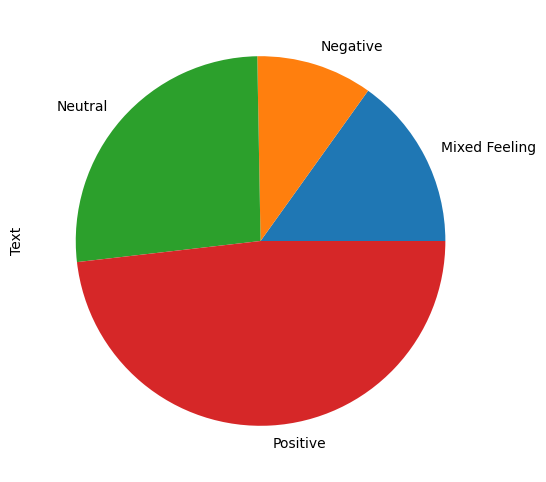

In [145]:
# visualize using PieChart
fig,axis=plt.subplots(figsize=(8,6))
senti_tulu_train_dataset.groupby('Annotations')['Text'].count().plot.pie(ax=axis)

In [146]:
# Preprocess sen_tam_test_without_labels data
senti_tulu_train_dataset['Text'] = senti_tulu_train_dataset['Text'].apply(preprocess_text)
senti_tulu_train_dataset['Text'] = senti_tulu_train_dataset['Text'].apply(replace_emoji)
senti_tulu_train_dataset['Text'] = senti_tulu_train_dataset['Text'].apply(remove_punctuation)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Text after removing regular expression to match URLs: dumbu ora consent batt potundu
Text after removing digital: dumbu ora consent batt potundu
Final pre-processed text: dumbu ora consent batt potundu
Original Text: р▓╕р│Вр▓кр▓░р│Н р▓ор▓░р│Нр▓░р│Ж ЁЯШБЁЯШБЁЯШБЁЯШБЁЯШБ
Text after removing HTML tags: р▓╕р│Вр▓кр▓░р│Н р▓ор▓░р│Нр▓░р│Ж ЁЯШБЁЯШБЁЯШБЁЯШБЁЯШБ
Converting to lowercase: р▓╕р│Вр▓кр▓░р│Н р▓ор▓░р│Нр▓░р│Ж ЁЯШБЁЯШБЁЯШБЁЯШБЁЯШБ
Text after removing regular expression to match URLs: р▓╕р│Вр▓кр▓░р│Н р▓ор▓░р│Нр▓░р│Ж ЁЯШБЁЯШБЁЯШБЁЯШБЁЯШБ
Text after removing digital: р▓╕р│Вр▓кр▓░р│Н р▓ор▓░р│Нр▓░р│Ж ЁЯШБЁЯШБЁЯШБЁЯШБЁЯШБ
Final pre-processed text: р▓╕р│Вр▓кр▓░р│Н р▓ор▓░р│Нр▓░р│Ж ЁЯШБЁЯШБЁЯШБЁЯШБЁЯШБ
Original Text: This story is based on true events in Tumkuru which we read months back in our Daily Newspapers, good job by everyone..
Baari shok aatnd
Text after removing HTML tags: This story is based on true events in Tumkuru which we read months back in our Daily Newspapers, good job by everyon

In [147]:
# Save cleaned train_dataset to CSV file
senti_tulu_train_dataset.to_csv('./cleaned_data/tulu-train.csv', index=False)

In [148]:
#Load sen_tam_test_without_labels data
sen_tulu_test_without_label = pd.read_csv('./data/sen_tulu_test_without_label .csv')#, encoding='ISO-8859-1')
# Preprocess sen_tam_test_without_labels data
sen_tulu_test_without_label['Text'] = sen_tulu_test_without_label['Text'].apply(preprocess_text)
sen_tulu_test_without_label['Text'] = sen_tulu_test_without_label['Text'].apply(replace_emoji)
sen_tulu_test_without_label['Text'] = sen_tulu_test_without_label['Text'].apply(remove_punctuation)

Original Text: Suraaj shetr eer manjeswaradaara wow yanla alpadaale sir er yenk masth esta sir
Text after removing HTML tags: Suraaj shetr eer manjeswaradaara wow yanla alpadaale sir er yenk masth esta sir
Converting to lowercase: suraaj shetr eer manjeswaradaara wow yanla alpadaale sir er yenk masth esta sir
Text after removing regular expression to match URLs: suraaj shetr eer manjeswaradaara wow yanla alpadaale sir er yenk masth esta sir
Text after removing digital: suraaj shetr eer manjeswaradaara wow yanla alpadaale sir er yenk masth esta sir
Final pre-processed text: suraaj shetr eer manjeswaradaara wow yanla alpadaale sir er yenk masth esta sir
Original Text: Bari Porluda Comedy Show
Text after removing HTML tags: Bari Porluda Comedy Show
Converting to lowercase: bari porluda comedy show
Text after removing regular expression to match URLs: bari porluda comedy show
Text after removing digital: bari porluda comedy show
Final pre-processed text: bari porluda comedy show
Original T

In [149]:
# Save cleaned train_dataset to CSV file
sen_tulu_test_without_label.to_csv('./cleaned_data/sen_tulu_test_without_label .csv', index=False)